In [1]:
import csv

In [2]:
import matplotlib.pyplot as plt

In [3]:
gain_no = {'1': 0, '2': 0, '3+': 0}
loss_no = {'0': 0, '1': 0, '2+': 0}

In [4]:
with open("../data/homology/ss/out/origin.csv", 'r') as f:
    reader = csv.reader(f)
    next(reader)

    for row in reader:
        gene, meta_exon, p, ss, _, gain_ages, loss_ages, pos_group, neg_group, tree_size, _ = row

        no_gain_ages = len(gain_ages.split(';'))

        if no_gain_ages < 3:
            gain_no[str(no_gain_ages)] += 1
        else:
            gain_no['3+'] += 1

        if loss_ages == "-":
            loss_no['0'] += 1
        else:
            no_loss_ages = len(loss_ages.split(';'))

            if no_loss_ages == 1:
                loss_no['1'] += 1
            else:
                loss_no['2+'] += 1

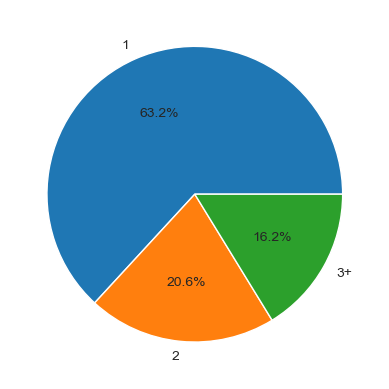

In [5]:
percentages = [gain_no[num] / sum(gain_no.values()) * 100 for num in ['1', '2', '3+']]

_ = plt.pie(percentages, labels=["1", "2", "3+"], autopct='%1.1f%%')
plt.savefig("figs/supp1d.pdf")

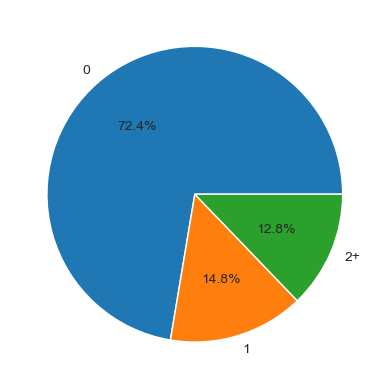

In [6]:
percentages = [loss_no[num] / sum(loss_no.values()) * 100 for num in ['0', '1', '2+']]

_ = plt.pie(percentages, labels=["0", "1", "2+"], autopct='%1.1f%%')
plt.savefig("figs/supp1e.pdf")